# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Salnikov Alexander*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import importlib as imp
%matplotlib inline

Import main homework python module

In [200]:
import hw_2
imp.reload(hw_2)

<module 'hw_2' from '/Users/insider/Dropbox/mac/projectos/hse/masters/zhukov/hw_2/hw_2.py'>

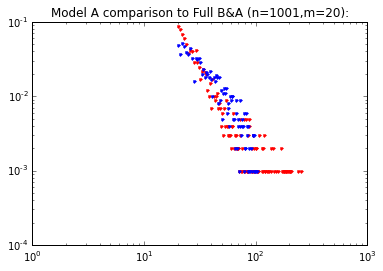

In [148]:
plt.figure()
plt.title("Model A comparison to Full B&A (n=1001,m=20):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(1001,20))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_a(1001,20))),"b.")

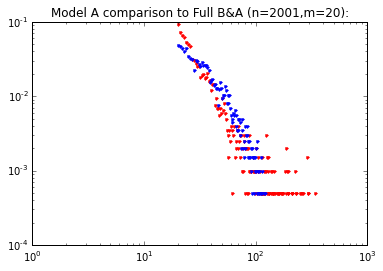

In [149]:
plt.figure()
plt.title("Model A comparison to Full B&A (n=2001,m=20):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(2001,20))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_a(2001,20))),"b.")

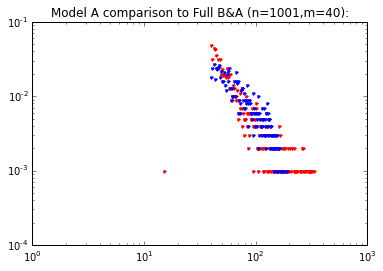

In [150]:
plt.figure()
plt.title("Model A comparison to Full B&A (n=1001,m=40):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(1001,40))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_a(1001,40))),"b.")

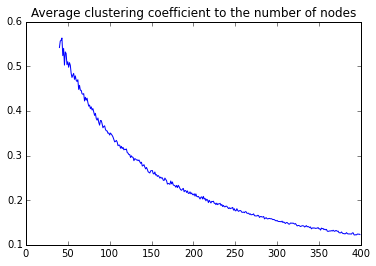

In [162]:
number_of_nodes = range(40,400)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(hw_2.random_graph_model_a(n,20)))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes")

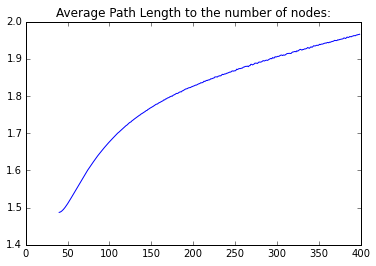

In [161]:
number_of_nodes = range(40,400)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(hw_2.random_graph_model_a(n,20)))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes:")

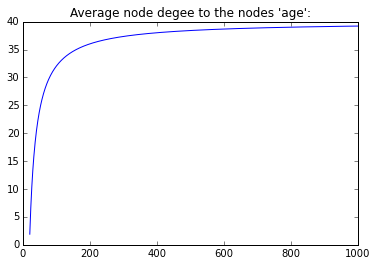

In [164]:
[iters, average_node_degree] = hw_2.random_graph_model_a_average_node_degree_on_iter(1000,20)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age':")

As we can see from the illustrations, in model A frequency of high degree nodes is less in compare with full A&B model, that indicates lack of hubs in the network and therefore confirms that model A does not holds power law and also does not have a scale free property.

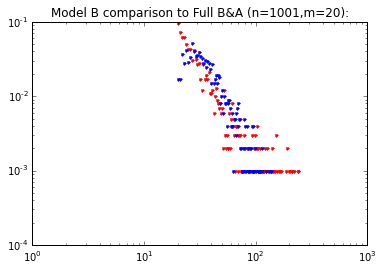

In [165]:
plt.figure()
plt.title("Model B comparison to Full B&A (n=1001,m=20):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(1001,20))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_b(1001,20))),"b.")

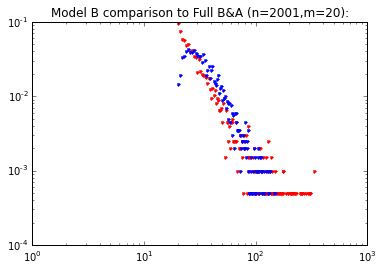

In [166]:
plt.figure()
plt.title("Model B comparison to Full B&A (n=2001,m=20):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(2001,20))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_b(2001,20))),"b.")

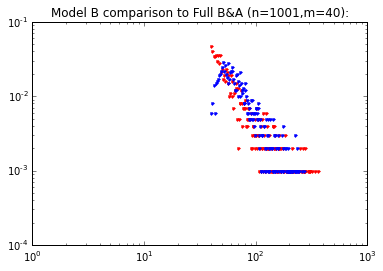

In [167]:
plt.figure()
plt.title("Model B comparison to Full B&A (n=1001,m=40):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(nx.barabasi_albert_graph(1001,40))),"r.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_model_b(1001,40))),"b.")

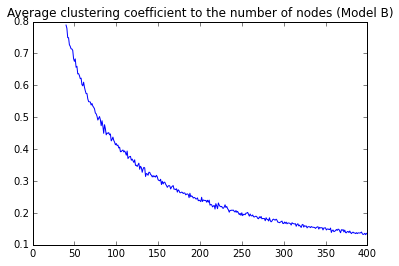

In [170]:
number_of_nodes = range(40,400)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(hw_2.random_graph_model_b(n,20)))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes (Model B)")

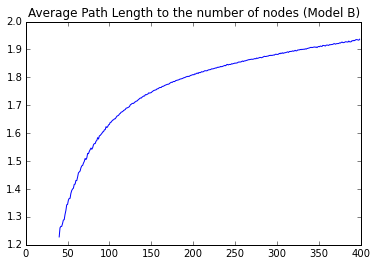

In [171]:
number_of_nodes = range(40,400)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(hw_2.random_graph_model_b(n,20)))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes (Model B)")

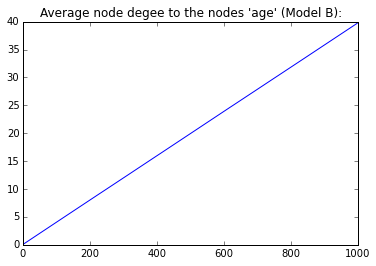

In [174]:
[iters, average_node_degree] = hw_2.random_graph_model_b_average_node_degree_on_iter(1000,20)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model B):")

As we can see from illustrations of model B networks, PDFs of this networks are peaked so model B does not holds a power law and does not have scale free property.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

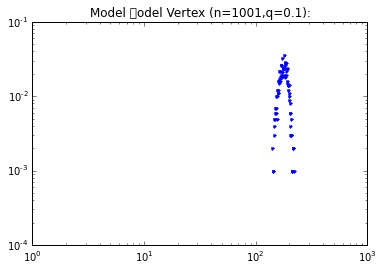

In [175]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1001,q=0.1):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_vertex_copying_model(1001,0.1))),"b.")


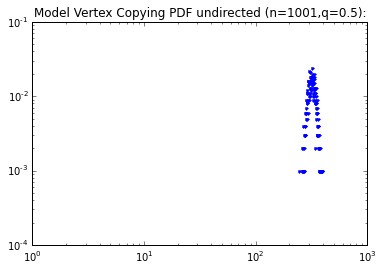

In [176]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1001,q=0.5):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_vertex_copying_model(1001,0.5))),"b.")


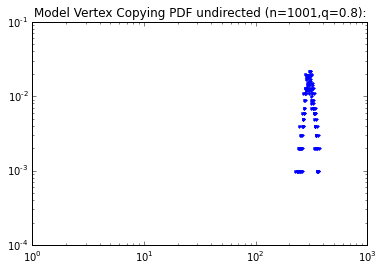

In [177]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1001,q=0.8):")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(hw_2.random_graph_vertex_copying_model(1001,0.5))),"b.")

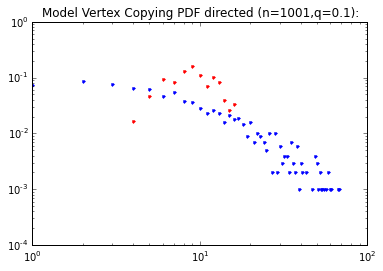

In [182]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1001,q=0.1):")
g = hw_2.random_graph_vertex_copying_model(1001,0.1,is_directed=True)
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="in")),"b.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="out")),"r.")

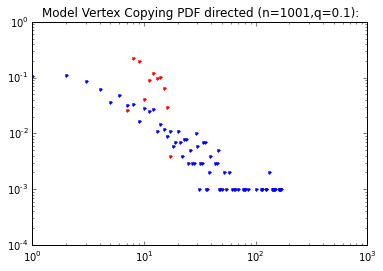

In [181]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1001,q=0.5):")
g = hw_2.random_graph_vertex_copying_model(1001,0.5,is_directed=True)
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="in")),"b.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="out")),"r.")

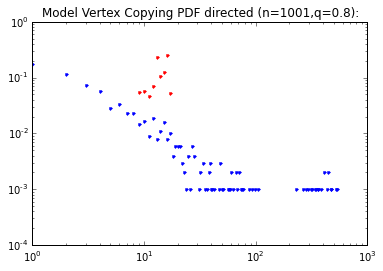

In [184]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1001,q=0.8):")
g = hw_2.random_graph_vertex_copying_model(1001,0.8,is_directed=True)
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="in")),"b.")
plt.loglog(hw_2.get_pdf(hw_2.get_node_degrees(g,direction="out")),"r.")

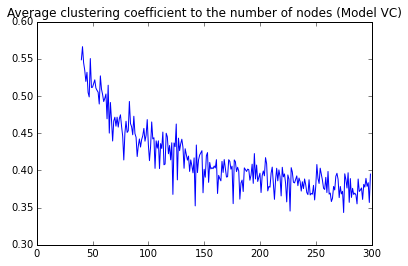

In [187]:
number_of_nodes = range(40,300)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(
            hw_2.random_graph_vertex_copying_model(n,0.5)
        ))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes (Model VC)")

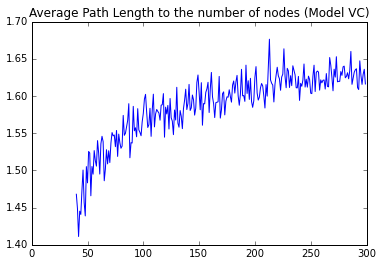

In [193]:
number_of_nodes = range(40,300)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(
            hw_2.random_graph_vertex_copying_model(n,0.5)
        ))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes (Model VC)")

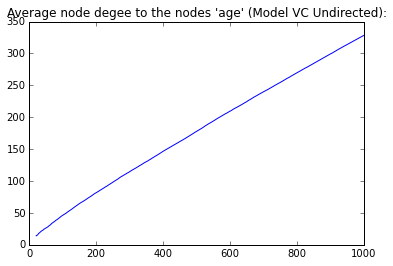

In [201]:
[iters, average_node_degree] = hw_2.random_graph_vertex_copying_model_average_node_degree_on_iter(1000,0.5)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC Undirected):")

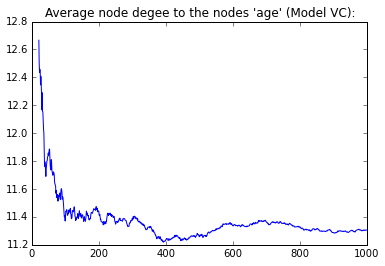

In [203]:
[iters, average_node_degree] = \
    hw_2.random_graph_vertex_copying_model_average_node_degree_on_iter(1000,0.5, is_directed=True,direction="in")
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC):")

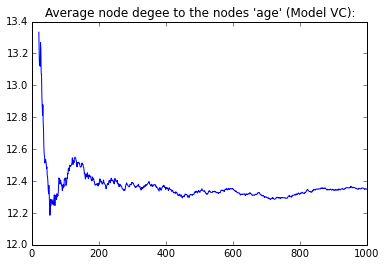

In [206]:
[iters, average_node_degree] = \
    hw_2.random_graph_vertex_copying_model_average_node_degree_on_iter(1000,0.5, is_directed=True,direction="out")
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC):")